# Bank Database Analysis

### This notebook provides a comprehensive data analysis of the financial.db database:

There are 8 tables within the financial.db database:
* **account**: each record describes static characteristics of an account
* **client**: each record describes characteristics of a client
* **disp**: each record relates together a client with an account
* **order**: each record describes characteristics of a payment order
* **trans**: each record describes one transaction on an account
* **loan**: each record describes a loan granted for a given account
* **card**: each record describes a credit card issued to an account
* **district**: each record describes demographic characteristics of a district  

### Each table will be analyzed in 3 parts:

        1. A basic overview of each table's data structure
        2. Basic summary statistics of numeric variables
        3. A visualization and analysis of key variables from the tables

In [ ]:
### import necessary packages for database manipulation and analysis

import sqlite3
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import datasets
import math
import numpy as np

In [2]:
### set up sqlite connection with financial.db

conn = sqlite3.connect('financial.db')
c = conn.cursor()

### alter dataframe options to present floats with 2 decimal points
pd.set_option('display.float_format', lambda x: '%.2f' % x)
plt.style.use('bmh')

## District Table

Provides demographic information about each district in the Czech Republic where the bank operates. 

* **There are 77 records and 15 non-primary-index columns**


### Column Name Key:
* **district_id:** index column 	
* **A2:** district name	
* **A3:** region	
* **A4:** no. of inhabitants (in thousands)
* **A5:** no. of municipalities with inhabitants < 499	
* **A6:** no. of municipalities with inhabitants 500-1999	
* **A7:** no. of municipalities with inhabitants 2000-9999	
* **A8:** no. of municipalities with inhabitants >10000	
* **A9:** no. of cities	
* **A10:** ratio of urban inhabitants	
* **A11:** average salary	
* **A12:** unemploymant rate '95	
* **A13:** unemploymant rate '96	
* **A14:** no. of enterpreneurs per 1000 inhabitants	
* **A15:** no. of commited crimes '95	
* **A16:** no. of commited crimes '96	



In [3]:
### Reading in district table from financial.db and converting to a dataframe
district = pd.read_sql_query("SELECT * FROM district;", conn,
                             index_col = "district_id")

### Converting population column to units in thousands 
district['A4'] /= 1000

print(district.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77 entries, 1 to 77
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A2      77 non-null     object 
 1   A3      77 non-null     object 
 2   A4      77 non-null     float64
 3   A5      77 non-null     int64  
 4   A6      77 non-null     int64  
 5   A7      77 non-null     int64  
 6   A8      77 non-null     int64  
 7   A9      77 non-null     int64  
 8   A10     77 non-null     float64
 9   A11     77 non-null     int64  
 10  A12     76 non-null     float64
 11  A13     77 non-null     float64
 12  A14     77 non-null     int64  
 13  A15     76 non-null     float64
 14  A16     77 non-null     int64  
dtypes: float64(5), int64(8), object(2)
memory usage: 9.6+ KB
None


In [4]:
district.head()

,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
district_id,,,,,,,,,,,,,,,
1,Hl.m. Praha,Prague,1204.95,0,0,0,1,1,100.00,12541,0.20,0.43,167,85677.00,99107
2,Benesov,central Bohemia,88.88,80,26,6,2,5,46.70,8507,1.60,1.85,132,2159.00,2674
3,Beroun,central Bohemia,75.23,55,26,4,1,5,41.70,8980,1.90,2.21,111,2824.00,2813
4,Kladno,central Bohemia,149.89,63,29,6,2,6,67.40,9753,4.60,5.05,109,5244.00,5892
5,Kolin,central Bohemia,95.62,65,30,4,1,6,51.40,9307,3.80,4.43,118,2616.00,3040


### Basic Statistical Summary of District Table:

* Columns A4 - A16 contain numeric data
* There are 77 records per column with the exception of column A12 and A15 which contain 1 null value each.

In [5]:
district.describe()

,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16
count,77.00,77.00,77.00,77.00,77.00,77.00,77.00,77.00,76.00,77.00,77.00,76.00,77.00
mean,133.88,48.62,24.32,6.27,1.73,6.26,63.04,9031.68,3.07,3.79,116.13,4850.32,5030.83
std,136.91,32.74,12.78,4.02,1.01,2.44,16.22,790.20,1.66,1.91,16.61,9888.95,11270.80
min,42.82,0.00,0.00,0.00,0.00,1.00,33.90,8110.00,0.20,0.43,81.00,818.00,888.00
25%,85.85,22.00,16.00,4.00,1.00,5.00,51.90,8512.00,1.70,2.31,105.00,2029.75,2122.00
50%,108.87,49.00,25.00,6.00,2.00,6.00,59.80,8814.00,2.80,3.60,113.00,2932.00,3040.00
75%,139.01,71.00,32.00,8.00,2.00,8.00,73.50,9317.00,3.85,4.79,126.00,4525.50,4595.00
max,1204.95,151.00,70.00,20.00,5.00,11.00,100.00,12541.00,7.30,9.40,167.00,85677.00,99107.00


In [6]:
### Printing number of null values per column in district table
print(district.isnull().sum())
print(f'There are {district.isnull().values.sum()} null values in the district table')

A2     0
A3     0
A4     0
A5     0
A6     0
A7     0
A8     0
A9     0
A10    0
A11    0
A12    1
A13    0
A14    0
A15    1
A16    0
dtype: int64
There are 2 null values in the district table


## Distributions of Values in Numeric Columns of District Table

Based on the histograms of values shown below, the distributions of each column in the district table can be quickly visualized. The majority of districts have populations less than 500,000 with one exception (the capital city Prague) that exceeds 1 million inhabitants. Most municipalities are relatively small with less than 500 inhabitants. Each district has an average of about 6 cities where the ratio of urban living is typically above 50%. Average salary for districts is just above 9000. Unemployment as well as crime rates from 1995 to 1996 have increased. 

/home/mika/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/mika/anaconda3/lib/python3.8/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


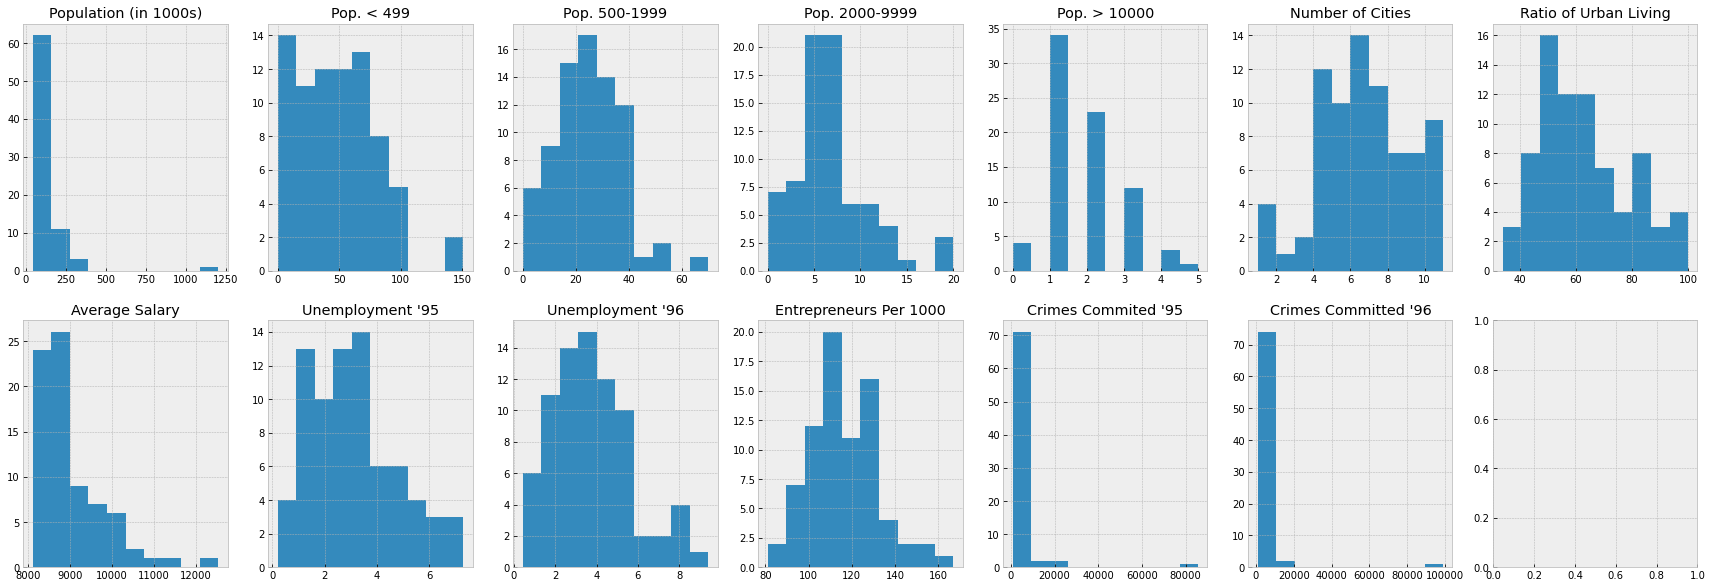

In [7]:
### Using shortened names from Column Key for figure titles
column_names = ["Population (in 1000s)", "Pop. < 499", 
                   "Pop. 500-1999", "Pop. 2000-9999",
                   "Pop. > 10000", "Number of Cities", "Ratio of Urban Living", "Average Salary", 
                   "Unemployment '95", "Unemployment '96", "Entrepreneurs Per 1000",
                   "Crimes Commited '95", "Crimes Committed '96"]


fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(30, 10), sharey=False)
axs = axs.flatten()

### Looping over district table columns (excluding first 2 non-numeric columns) to create histograms
for idx, col in enumerate(district.iloc[:,2:]):
    axs[idx].hist(district[col])
    axs[idx].set_title(f'{column_names[idx]}')


### Key Information by Region

Aggregating the data by region provides a more generalized picture of population data. Prague represents itself as a single region and district with the highest average salary. It is interesting to note that while South Moravia has the highest population and number of cities, the average salary is the 2nd lowest, which indicate that regions with many sparsely populated municipalities (i.e. rural areas) typically have lower salaries. 

In [9]:
district_region = pd.read_sql_query("SELECT A3, COUNT(district_id) AS 'Districts', SUM(A4) AS 'Population', SUM(A9) AS 'Cities', AVG(A11) AS 'Avg Salary' FROM district GROUP BY A3 ORDER BY Districts", conn)
district_region

,A3,Districts,Pop in 1000s,Cities,Avg Salary
0,Prague,1,1204953,1,12541.00
1,south Bohemia,8,700595,48,8831.50
2,north Bohemia,10,1178977,70,9334.20
3,west Bohemia,10,859306,69,9015.40
4,east Bohemia,11,1234781,86,8611.18
5,north Moravia,11,1970302,60,9049.18
6,central Bohemia,12,1105234,66,9357.25
7,south Moravia,14,2054989,82,8728.50


## Client Table

Stores information about each client the bank serves. 

* 5369 records
* **Primary index column**: client_id. 
* **3 non-primary-index columns**: gender, birth_date, and district_id. 
* **district_id**: index column associated with the Demographic Table which attaches a client to the district they reside in.  

In [9]:
### Reading in client table from financial.db and converting to a dataframe
client = pd.read_sql_query("SELECT * FROM client;", conn,
                           index_col = 'client_id')

## Displaying data structure and head of dataframe
client.info()
client.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5369 entries, 1 to 13998
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       5369 non-null   object
 1   birth_date   5369 non-null   object
 2   district_id  5369 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 167.8+ KB


,gender,birth_date,district_id
client_id,,,
1,F,1970-12-13,18
2,M,1945-02-04,1
3,F,1940-10-09,1
4,M,1956-12-01,5
5,F,1960-07-03,5


### Top 10 Highest Client Districts

The table below aggregates districts by their region and number of clients. By far the largest number of clients come from Prague, while the next highest districts with clients in the 100-200 range are all in either North or South Moravia.

In [41]:
### SQL query that aggregates number of clients by district, ordering by highest client count
client_district = pd.read_sql_query("SELECT c.district_id, d.A2 AS 'district name', d.A3 AS region, COUNT(c.client_id) AS 'no of clients' FROM client c JOIN district d ON d.district_id = c.district_id GROUP BY c.district_id ORDER BY COUNT(client_id) DESC", conn)
client_district.head(n = 10)


,district_id,district name,region,no of clients
0,1,Hl.m. Praha,Prague,663
1,74,Ostrava - mesto,north Moravia,180
2,70,Karvina,north Moravia,169
3,54,Brno - mesto,south Moravia,155
4,64,Zlin,south Moravia,109
5,72,Olomouc,north Moravia,104
6,68,Frydek - Mistek,north Moravia,86
7,46,Nachod,east Bohemia,76
8,52,Usti nad Orlici,east Bohemia,73
9,5,Kolin,central Bohemia,71


### Client Distribution By Age

The client_age table assumes that this data is being explored in the year 1999 (based off the description in the assignment). With this in mind, an approximate age is computed by subtracting the client birth year by the first day in 1999. The histogram below shows the distribution of approximate ages. The average client age is 44 years old with a notable spike of almost 500 clients in the 20 year range. 

The average client age is 44 years old
The youngest client is 11 years old
The oldest client is 87 years old


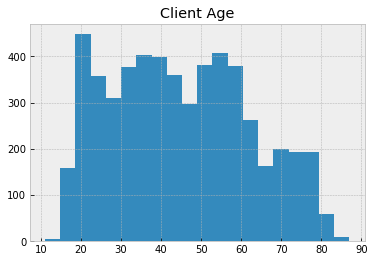

In [11]:
### SQL query that calculates age of client based on year of original challenge description
client_age = pd.read_sql_query("SELECT client_id, CAST((julianday('1999-01-01') - julianday(birth_date)) / 365 AS int) AS 'Age' FROM client", conn)
print(f'The average client age is {math.floor(client_age["Age"].mean())} years old')
print(f'The youngest client is {math.floor(client_age["Age"].min())} years old')
print(f'The oldest client is {math.floor(client_age["Age"].max())} years old')

plt.hist(client_age['Age'], bins = 20, histtype = 'bar')
plt.title('Client Age')
plt.show()


## Account Table

Stores information about each account the bank manages. 

* 4500 records
* **Primary index column:** account_id. 
* **3 non-primary-index columns:** district_id, frequency, and date. 
* **district_id**: index column associated with the Demographic table, which attaches each account with the district they originate from
* **frequency**: stores information on how often the bank issues statements to the account. 
* **date**: refers to when the account was established.

In [43]:
### Reading in account table from financial.db and converting to a dataframe
account = pd.read_sql_query("SELECT * FROM account;", conn,
                            index_col = "account_id")

### Changing strings in frequency column from Czech to English

account.loc[account['frequency'] == 'POPLATEK MESICNE', 'frequency'] = 'Monthly'
account.loc[account['frequency'] == 'POPLATEK PO OBRATU', 'frequency'] = 'After Transaction'
account.loc[account['frequency'] == 'POPLATEK TYDNE', 'frequency'] = 'Weekly'


In [44]:
account.info()
account.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4500 entries, 1 to 11382
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   district_id  4500 non-null   int64 
 1   frequency    4500 non-null   object
 2   date         4500 non-null   object
dtypes: int64(1), object(2)
memory usage: 140.6+ KB


,district_id,frequency,date
account_id,,,
1,18,Monthly,1995-03-24
2,1,Monthly,1993-02-26
3,5,Monthly,1997-07-07
4,12,Monthly,1996-02-21
5,15,Monthly,1997-05-30


### Number of Accounts Per Frequency of Statement Issuance

The table below groups accounts by their frequency of statement issuance. The information is plotted below showing that monthly statement issuance is by far the most widely used frequency.

In [49]:
account_freq = account.groupby(["frequency"], as_index=False)["district_id"].count()
account_freq


,frequency,district_id
0,After Transaction,93
1,Monthly,4167
2,Weekly,240


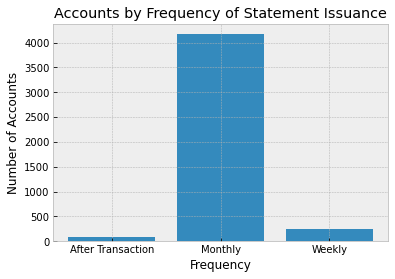

In [50]:
fig, ax = plt.subplots()
ax.bar(account_freq['frequency'], account_freq['district_id'])

plt.title('Accounts by Frequency of Statement Issuance')
plt.xlabel('Frequency')
plt.ylabel('Number of Accounts')
plt.show()


## Transaction Table

#### Stores information about account transactions. 

* 1056320 records
* **Primary index column**: trans_id
* **9 non-primary-index columns:** account_id, date, type, operation, amount, balance, k_symbol, bank, and account
* **account_id**: associated with the index column of the Account table and attaches each transaction to an account. 
* **date**: the date in which the transaction was performed. 
* **type**: refers to whether the transaction was a credit or a withdrawal. 
* **operation**: the mode of transaction i.e. card, cash, bank transfer. 
* **amount**: the amount of money transacted. 
* **balance:** the amount of money remaining in the account. 
* **k_symbol:** refers to the reason for the transaction i.e. insurance payment, loan payment, interest, etc. 
* **bank:** the bank of the partnering transactor. 
* **account:** the account of the partnering transactor. 


In [ ]:
### Reading in trans table from financial.db and converting to a dataframe
trans = pd.read_sql_query("SELECT * FROM trans;", conn)

### translating Czech to English
trans.loc[trans['type'] == 'PRIJEM', 'type'] = 'Credit'
trans.loc[trans['type'] == 'VYDAJ', 'type'] = 'Withdrawal'
trans.loc[trans['operation'] == 'VYBER KARTOU', 'operation'] = 'Credit Card'
trans.loc[trans['operation'] == 'VKLAD', 'operation'] = 'Cash Credit'
trans.loc[trans['operation'] == 'VYBER', 'operation'] = 'Cash Withdrawal'
trans.loc[trans['operation'] == 'PREVOD Z UCTU', 'operation'] = 'Bank Collection'
trans.loc[trans['operation'] == 'PREVOD NA UCET', 'operation'] = 'Bank Remittance'
trans.loc[trans['k_symbol'] == 'POJISTNE', 'k_symbol'] = 'Insurance Payment'
trans.loc[trans['k_symbol'] == 'SLUZBY', 'k_symbol'] = 'Payment for Statement'
trans.loc[trans['k_symbol'] == 'UROK', 'k_symbol'] = 'Interest Credited'
trans.loc[trans['k_symbol'] == 'SANKC. UROK', 'k_symbol'] = 'Sanction Interest'
trans.loc[trans['k_symbol'] == 'SIPO', 'k_symbol'] = 'Household'
trans.loc[trans['k_symbol'] == 'DUCHOD', 'k_symbol'] = 'Old-age Pension'
trans.loc[trans['k_symbol'] == 'UVER', 'k_symbol'] = 'Loan Payment'


In [17]:
## displaying basic data structure and row info
trans.info()
trans.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056320 entries, 0 to 1056319
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   trans_id    1056320 non-null  int64  
 1   account_id  1056320 non-null  int64  
 2   date        1056320 non-null  object 
 3   type        1056320 non-null  object 
 4   operation   873206 non-null   object 
 5   amount      1056320 non-null  int64  
 6   balance     1056320 non-null  int64  
 7   k_symbol    574439 non-null   object 
 8   bank        273508 non-null   object 
 9   account     295389 non-null   float64
dtypes: float64(1), int64(4), object(5)
memory usage: 80.6+ MB


,trans_id,account_id,date,type,operation,amount,balance,k_symbol,bank,account
0,1,1,1995-03-24,Credit,Cash Credit,1000,1000,None,None,nan
1,5,1,1995-04-13,Credit,Bank Collection,3679,4679,None,AB,41403269.00
2,6,1,1995-05-13,Credit,Bank Collection,3679,20977,None,AB,41403269.00
3,7,1,1995-06-13,Credit,Bank Collection,3679,26835,None,AB,41403269.00
4,8,1,1995-07-13,Credit,Bank Collection,3679,30415,None,AB,41403269.00


## Basic Summary Statistics for Transactions By Account

The table below further aggregates transactions by account and provides summary statistics for the number of transactions, average transaction, minimum transaction and max transaction. These 4 columns are then plotted below. 

In [10]:
### SQL query to aggregate basic summary statistics from transaction table grouping by account
trans_aggregate = pd.read_sql_query("SELECT account_id, COUNT(trans_id) AS 'No. of Transactions', AVG(amount) AS 'Average Transaction', MIN(amount) AS 'Min Transaction', MAX(amount) AS 'Max Transaction' FROM trans GROUP BY account_id", 
                                    conn, index_col = "account_id")
trans_aggregate.head()

,No. of Transactions,Average Transaction,Min Transaction,Max Transaction
account_id,,,,
1,239,1569.84,15,12600
2,478,6593.13,14,42000
3,117,2521.62,15,11253
4,186,1887.02,15,5553
5,84,1986.80,4,5100


In [14]:
trans_aggregate.describe()

,No. of Transactions,Average Transaction,Min Transaction,Max Transaction
count,4500.00,4500.00,4500.00,4500.00
mean,234.74,5757.76,16.49,29619.06
std,126.85,4030.52,28.42,20030.44
min,9.00,843.50,0.00,2901.00
25%,133.00,2303.28,15.00,11500.00
50%,208.00,4729.80,15.00,26500.00
75%,330.00,8352.23,15.00,45691.75
max,675.00,21062.69,700.00,87400.00


In [12]:
## create list of column names from trans_aggregate table
trans_ag_columns = list(trans_aggregate.columns)
trans_ag_columns

['No. of Transactions',
 'Average Transaction',
 'Min Transaction',
 'Max Transaction']

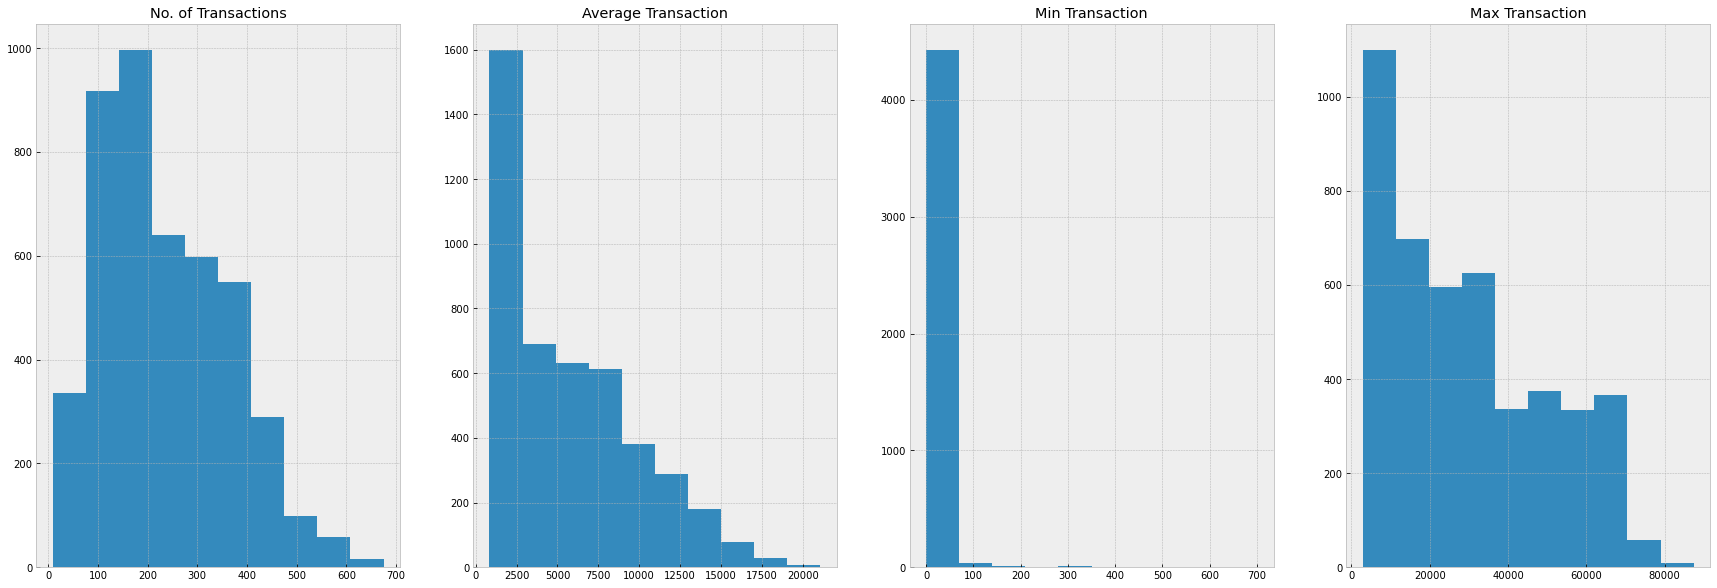

In [13]:
fig, axs = plt.subplots(ncols=4, nrows=1, figsize=(30, 10), sharey=False)
axs = axs.flatten()

### Looping over district table columns (excluding first 2 non-numeric columns) to create histograms
for idx, col in enumerate(trans_aggregate.iloc[:, :]):
    axs[idx].hist(trans_aggregate[col])
    axs[idx].set_title(f'{trans_ag_columns[idx]}')

### Grouping Number of Transactions By Reason for Payment/Credit

The table below aggregates the number of transactions by their reason for payment/credit. This information is then plotted below showing that interest credit is the leading reason for transaction followed by statement payment and house payments. 

Unfortunately, I couldn't figure out how to change the blank values to null values, so that section can be viewed as transactions without a specified reason.

In [4]:
## creating df that groups transactions by reason for transaction
trans_k = trans.groupby(["k_symbol"],as_index = False )["trans_id"].count()
trans_k

,k_symbol,trans_id
0,,53433
1,Household,118065
2,Insurance Payment,18500
3,Interest Credited,183114
4,Loan Payment,13580
5,Old-age Pension,30338
6,Payment for Statement,155832
7,Sanction Interest,1577


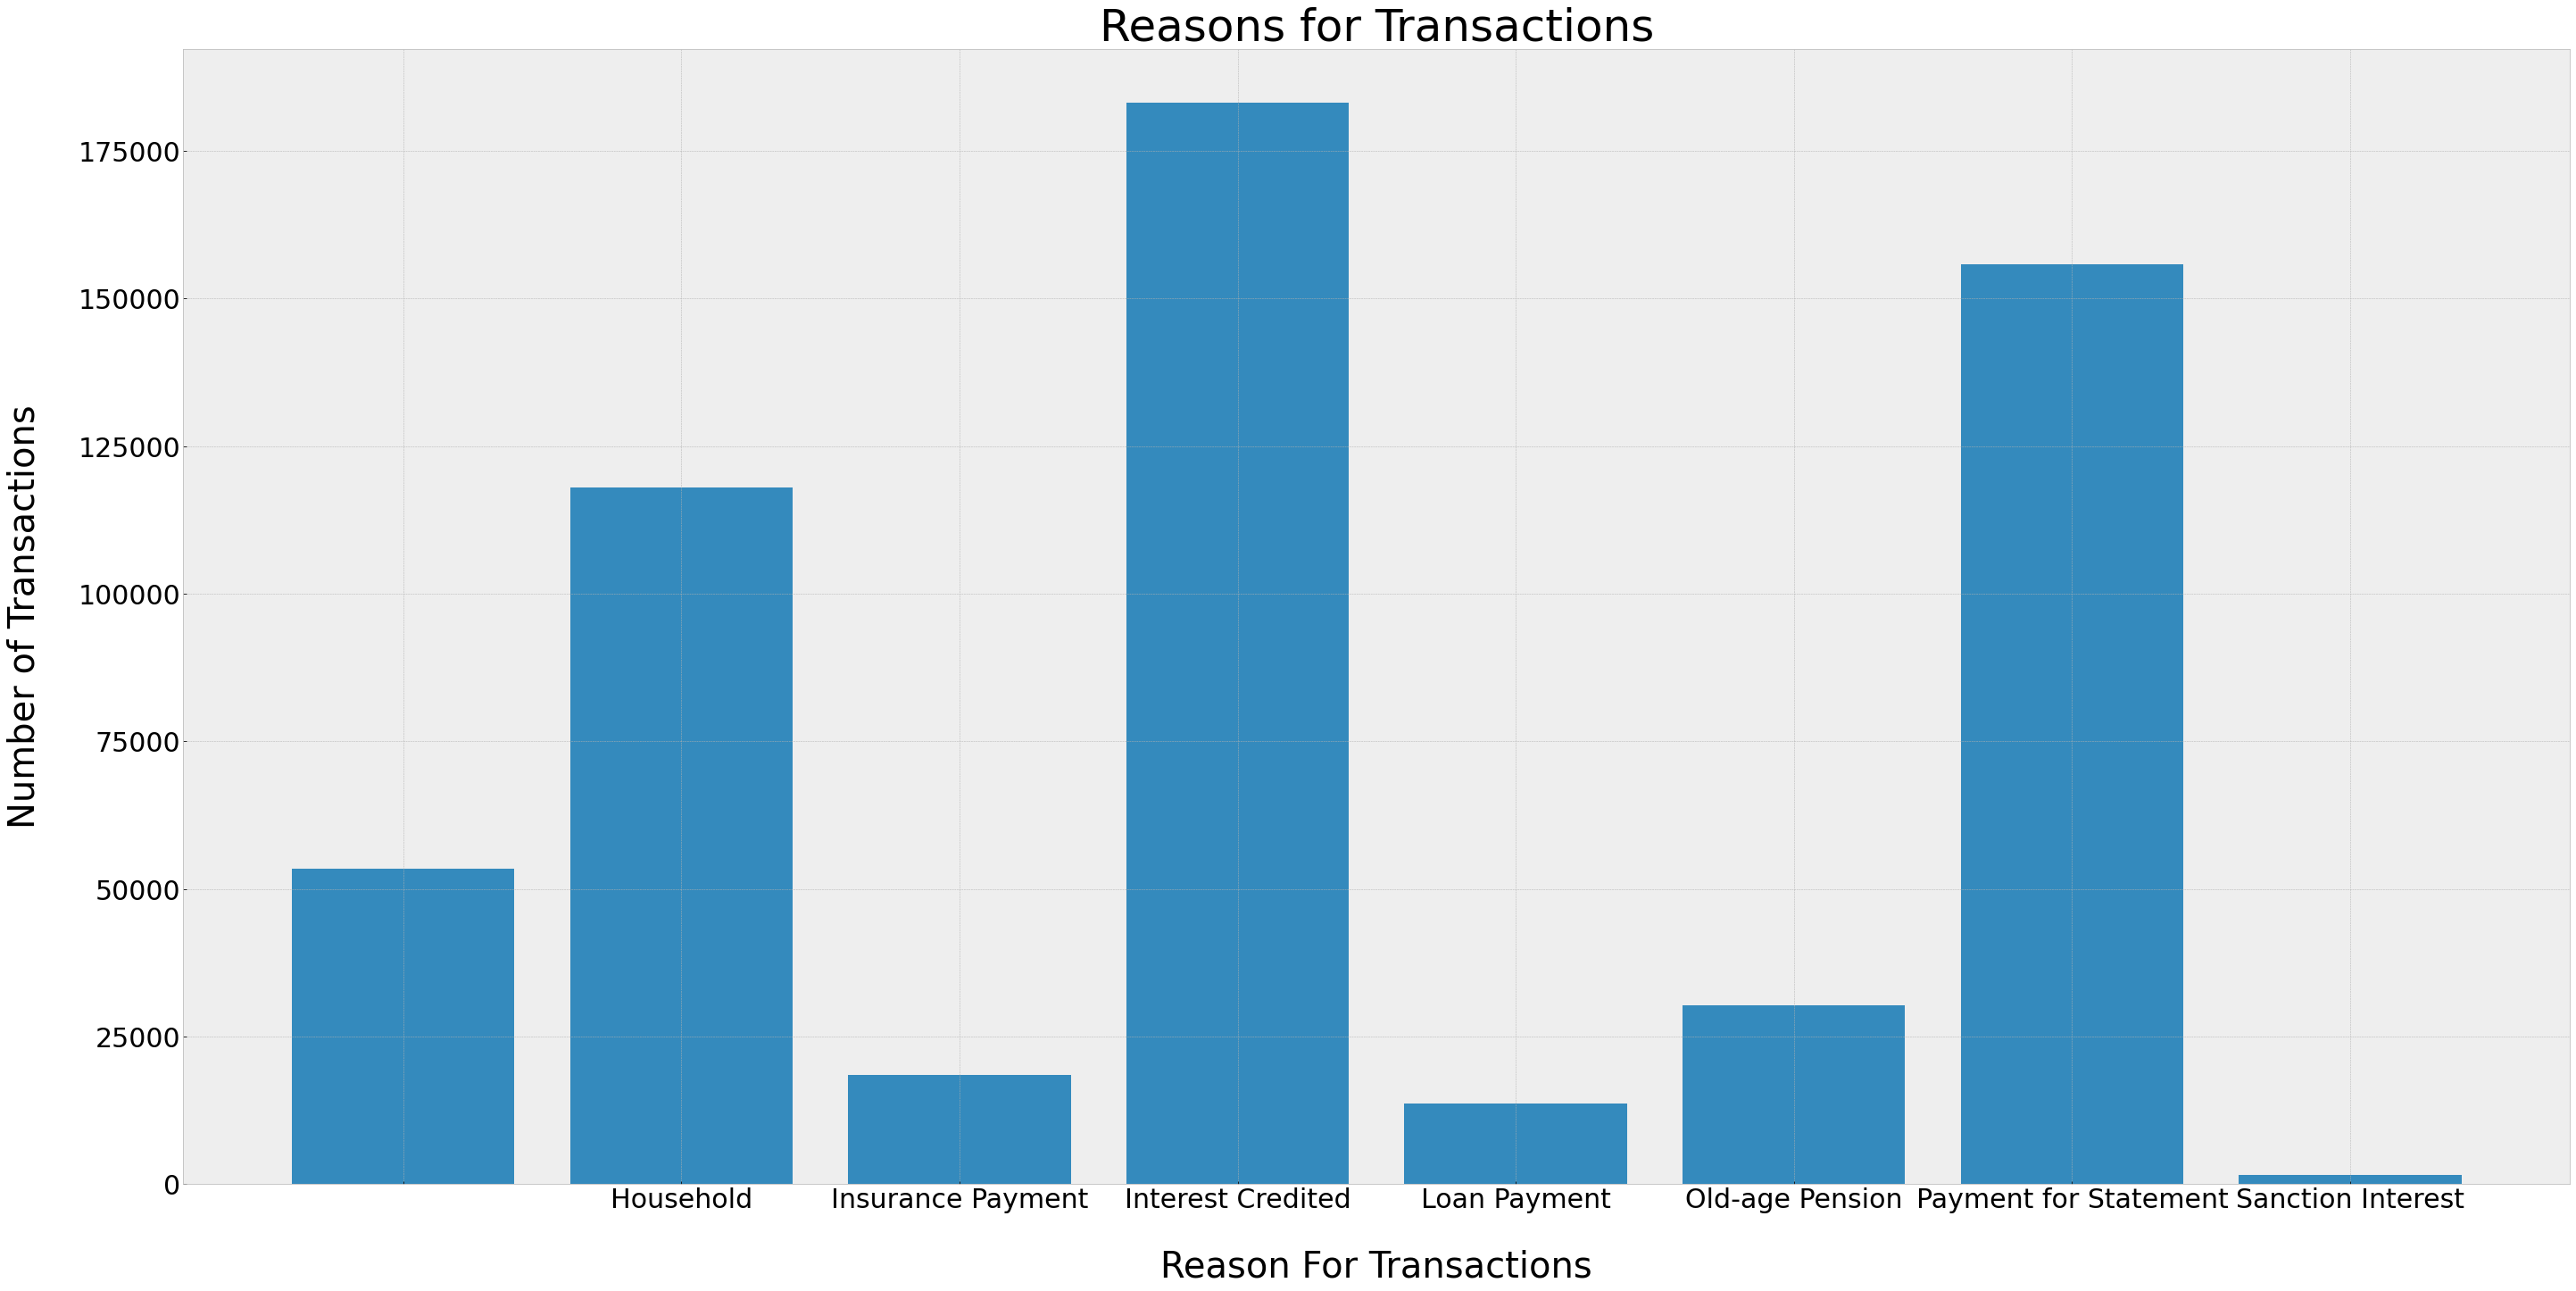

In [16]:
### plotting bar graph for transaction reason
fig, ax = plt.subplots(figsize=(40, 20))
ax.bar(trans_k['k_symbol'], trans_k['trans_id'])

ax.set_title('Reasons for Transactions', size=50)
ax.set_xlabel('Reason For Transactions', size=40, labelpad=40)
ax.set_ylabel('Number of Transactions', size=40, labelpad=40)
plt.xticks(size=30)
plt.yticks(size=30)


### Grouping Transactions by Operation

In [53]:
trans_operation = trans.groupby(["operation"], as_index=False)["account_id"].count()
trans_operation

,operation,account_id
0,Bank Collection,65226
1,Bank Remittance,208283
2,Cash Credit,156743
3,Cash Withdrawal,434918
4,Credit Card,8036


## Monthly Transactions Over 5 Year Period

The trans_date table aggregates the number of transactions by month-year and is plotted below as a time-series of monthly transactions over the timeline of the dataset. The number of transactions show a steady increase over the 5-year period -- this could be due to the collapse of the Soviet Union resulting in an emergence of private banks that have just started operation in the early 1990's. Notable spikes in transaction number occur during holiday season and summer months.

In [22]:
trans_date = pd.read_sql_query("SELECT strftime('%m-%Y', Date) as 'Month-Year', COUNT(trans_id) AS 'No. of Transactions' FROM trans GROUP BY strftime('%m-%Y', Date) ORDER BY Date", conn)
trans_date.head()

,Month-Year,No. of Transactions
0,01-1993,177
1,02-1993,395
2,03-1993,676
3,04-1993,913
4,05-1993,1306


Text(0.5, 1.0, 'Monthly Transactions (1993-1998)')

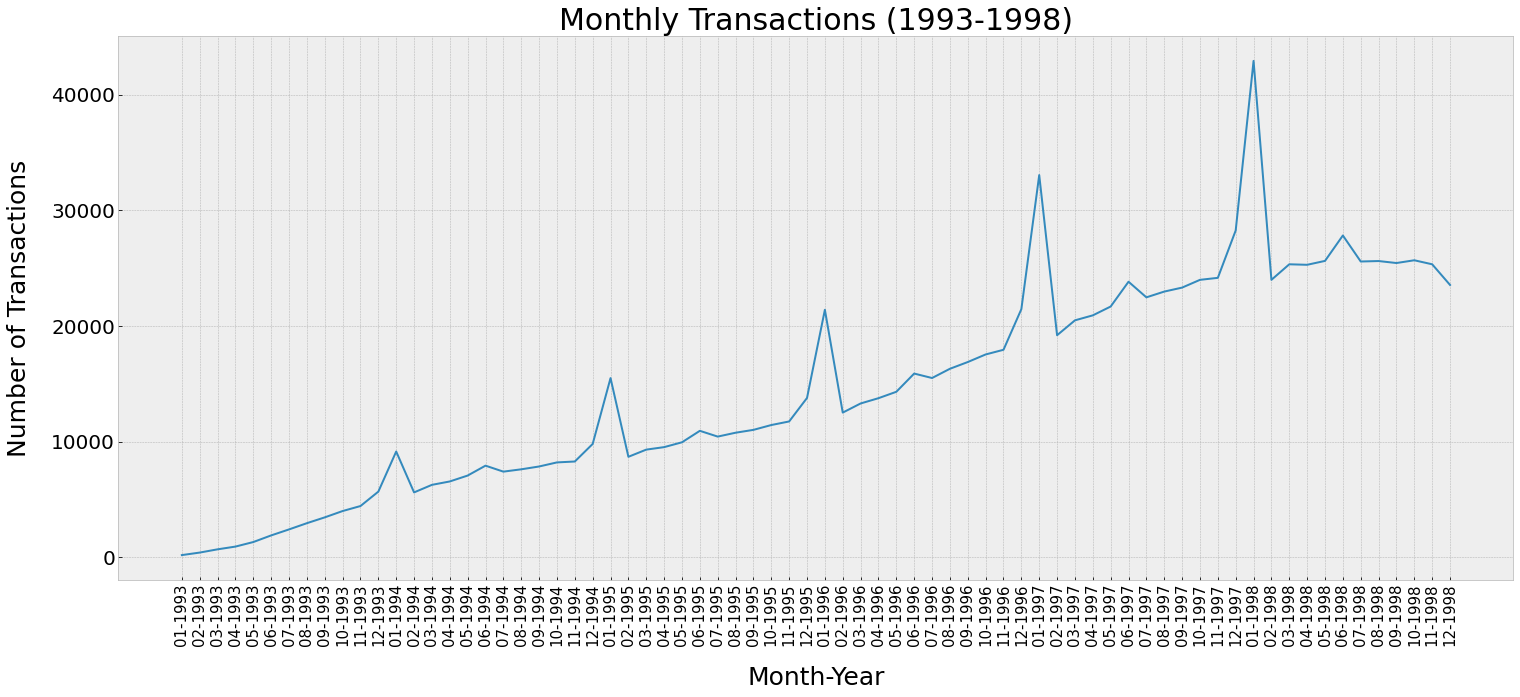

In [23]:
fig = plt.figure(figsize = (25, 10))
ax = plt.axes()

ax.plot(trans_date['Month-Year'], trans_date['No. of Transactions'])
ax.tick_params(axis='x', labelsize=15, rotation=90 )
#plt.xticks(fontsize=13 ,rotation=90)
ax.tick_params(axis='y',labelsize =20)
ax.set_xlabel("Month-Year", fontsize = 25, labelpad = 20)
ax.set_ylabel("Number of Transactions", fontsize = 25, labelpad = 20)
plt.title("Monthly Transactions (1993-1998)", fontsize = 30)


## Disposition Table

Stores information on the association between the client table and account table. The same 

* 5369 records
* **Primary index column:** disp_id 
* **3 non-primary-index columns:** client_id, account_id, and type. 
* **client_id and account_id:** associated to index columns in the client table and account table, respectively. 
* **type:** refers to the account authority of the client i.e. owner or disponent. 

In [24]:
### Reading in disp table from financial.db and converting to a dataframe
disp = pd.read_sql_query("SELECT * FROM disp;", conn,
                         index_col = "disp_id")
disp.info()
disp.head(n = 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5369 entries, 1 to 13690
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   client_id   5369 non-null   int64 
 1   account_id  5369 non-null   int64 
 2   type        5369 non-null   object
dtypes: int64(2), object(1)
memory usage: 167.8+ KB


,client_id,account_id,type
disp_id,,,
1,1,1,OWNER
2,2,2,OWNER
3,3,2,DISPONENT
4,4,3,OWNER
5,5,3,DISPONENT


### Number of Disponents and Owners

Disponents refer to a client attached to an owner's account who does not have the same authority as an owner i.e. filing for loans. The table below shows the number of disponents to owners.

In [15]:
### SQL query that creates df for number of disponents and owners from disp table
disp_type = pd.read_sql_query("SELECT type, COUNT(disp_id) AS count FROM disp GROUP BY type", conn)
disp_type

,type,count
0,DISPONENT,869
1,OWNER,4500


## Card Table

Stores information about credit cards issued to clients. 

* 892 records
* **Primary index:** card_id
* **3 non-primary-index columns:** disp_id, type, issued
* **disp_id:** associated with the index column in the Disposition table and attaches each card to a client and account. 
* **type:** status of the card issued i.e. junior, classic, gold.
* **issued:** date the card was issued to the client. 

In [26]:
### Reading in card table from financial.db and converting to a dataframe
card = pd.read_sql_query("SELECT * FROM card;", conn,
                         index_col = "card_id")
card.info()
card.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 892 entries, 1 to 1247
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   disp_id  892 non-null    int64 
 1   type     892 non-null    object
 2   issued   892 non-null    object
dtypes: int64(1), object(2)
memory usage: 27.9+ KB


,disp_id,type,issued
card_id,,,
1,9,gold,1998-10-16
2,19,classic,1998-03-13
3,41,gold,1995-09-03
4,42,classic,1998-11-26
5,51,junior,1995-04-24


### Number of Credit Cards Per Card Type

The card_type table groups the card table by card type and is plotted below. By far the most used card type is Classic, followed by Junior and Gold.

In [27]:
card_type = pd.read_sql_query("SELECT type, COUNT(card_id) AS count FROM card GROUP BY type ORDER BY count DESC", conn)
card_type

,type,count
0,classic,659
1,junior,145
2,gold,88


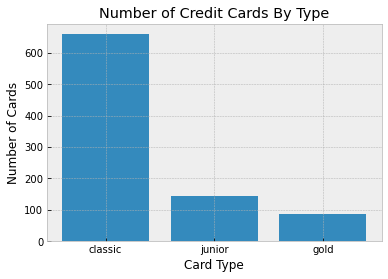

In [28]:
fig, ax = plt.subplots()
ax.bar(card_type['type'], card_type['count'])

plt.title('Number of Credit Cards By Type')
plt.xlabel('Card Type')
plt.ylabel('Number of Cards')
plt.show()

## Loan Table

Stores information about loans issued by the bank. 

* 682 records
* **Primary index:** loan_id 
* **6 non-primary-index columns:** account_id, date, amount, duration, payments, status
* **account_id:** associated with the index column of the Account table and attaches each loan with an account. 
* **date:** date of loan issuance 
* **amount:** total loan amount
* **duration:** duration of the loan in months
* **payments:** amount of each monthly payment
* **status:** classifies each loan by how well the loan is being paid off
    * **A**: contract finished, no problems
    * **B**: contract finished, loan not payed
    * **C**: running contract, OK so far
    * **D**: running contract, client in debt

In [29]:
### Reading in loan table from financial.db and converting to a dataframe
loan = pd.read_sql_query("SELECT * FROM loan;", conn,
                         index_col = "loan_id")
loan.info()
loan.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 682 entries, 4959 to 7308
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   account_id  682 non-null    int64 
 1   date        682 non-null    object
 2   amount      682 non-null    int64 
 3   duration    682 non-null    int64 
 4   payments    682 non-null    int64 
 5   status      682 non-null    object
dtypes: int64(4), object(2)
memory usage: 37.3+ KB


,account_id,date,amount,duration,payments,status
loan_id,,,,,,
4959,2,1994-01-05,80952,24,3373,A
4961,19,1996-04-29,30276,12,2523,B
4962,25,1997-12-08,30276,12,2523,A
4967,37,1998-10-14,318480,60,5308,D
4968,38,1998-04-19,110736,48,2307,C


### Loans by Status

The loan_type_count table below groups the loan table by loan status and is plotted below. Loan types A and C are the highest loan statuses showing that most loans filed through this bank are being paid off and reasonably managed.

In [30]:
#Creating sub-table from loan that aggregates the number of loans by status
loan_type_count = pd.read_sql_query("SELECT status, COUNT(loan_id) AS count FROM loan GROUP BY status", conn)
loan_type_count

,status,count
0,A,203
1,B,31
2,C,403
3,D,45


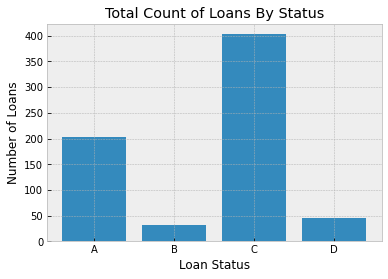

In [31]:
fig, ax = plt.subplots()
ax.bar(loan_type_count['status'], loan_type_count['count'])

plt.title('Total Count of Loans By Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans')
plt.show()

In [32]:
# creating dataframe of all accounts in loan status D
loan_status_D = pd.read_sql_query("SELECT DISTINCT(account_id) FROM loan WHERE status = 'D' OR status = 'B'", conn)
loan_status_D

,account_id
0,19
1,37
2,103
3,347
4,426
...,...
71,10266
72,10365
73,10451
74,10857


### Exploring Loan Status By Region

The table loan_district2 creates a table pivot that joins the district table and loan table to filter loan status by region. The results are plotted below. This plot indicates that the majority of B and D loans come from the regions of North and South Moravia. However, this could also be due to the fact that there are more loans being filed in that region overall. More exploration is needed.

In [23]:
loan_district2 = pd.read_sql_query("SELECT d.A3 Region, COUNT(l.loan_id) FILTER (WHERE status = 'A') A, COUNT(l.loan_id) FILTER (WHERE status = 'B') B, COUNT(l.loan_id) FILTER (WHERE status = 'C') C, COUNT(l.loan_id) FILTER (WHERE status = 'D') D FROM district d JOIN account a JOIN loan l ON d.district_id = a.district_id AND a.account_id = l.account_id GROUP BY d.A3", conn) 

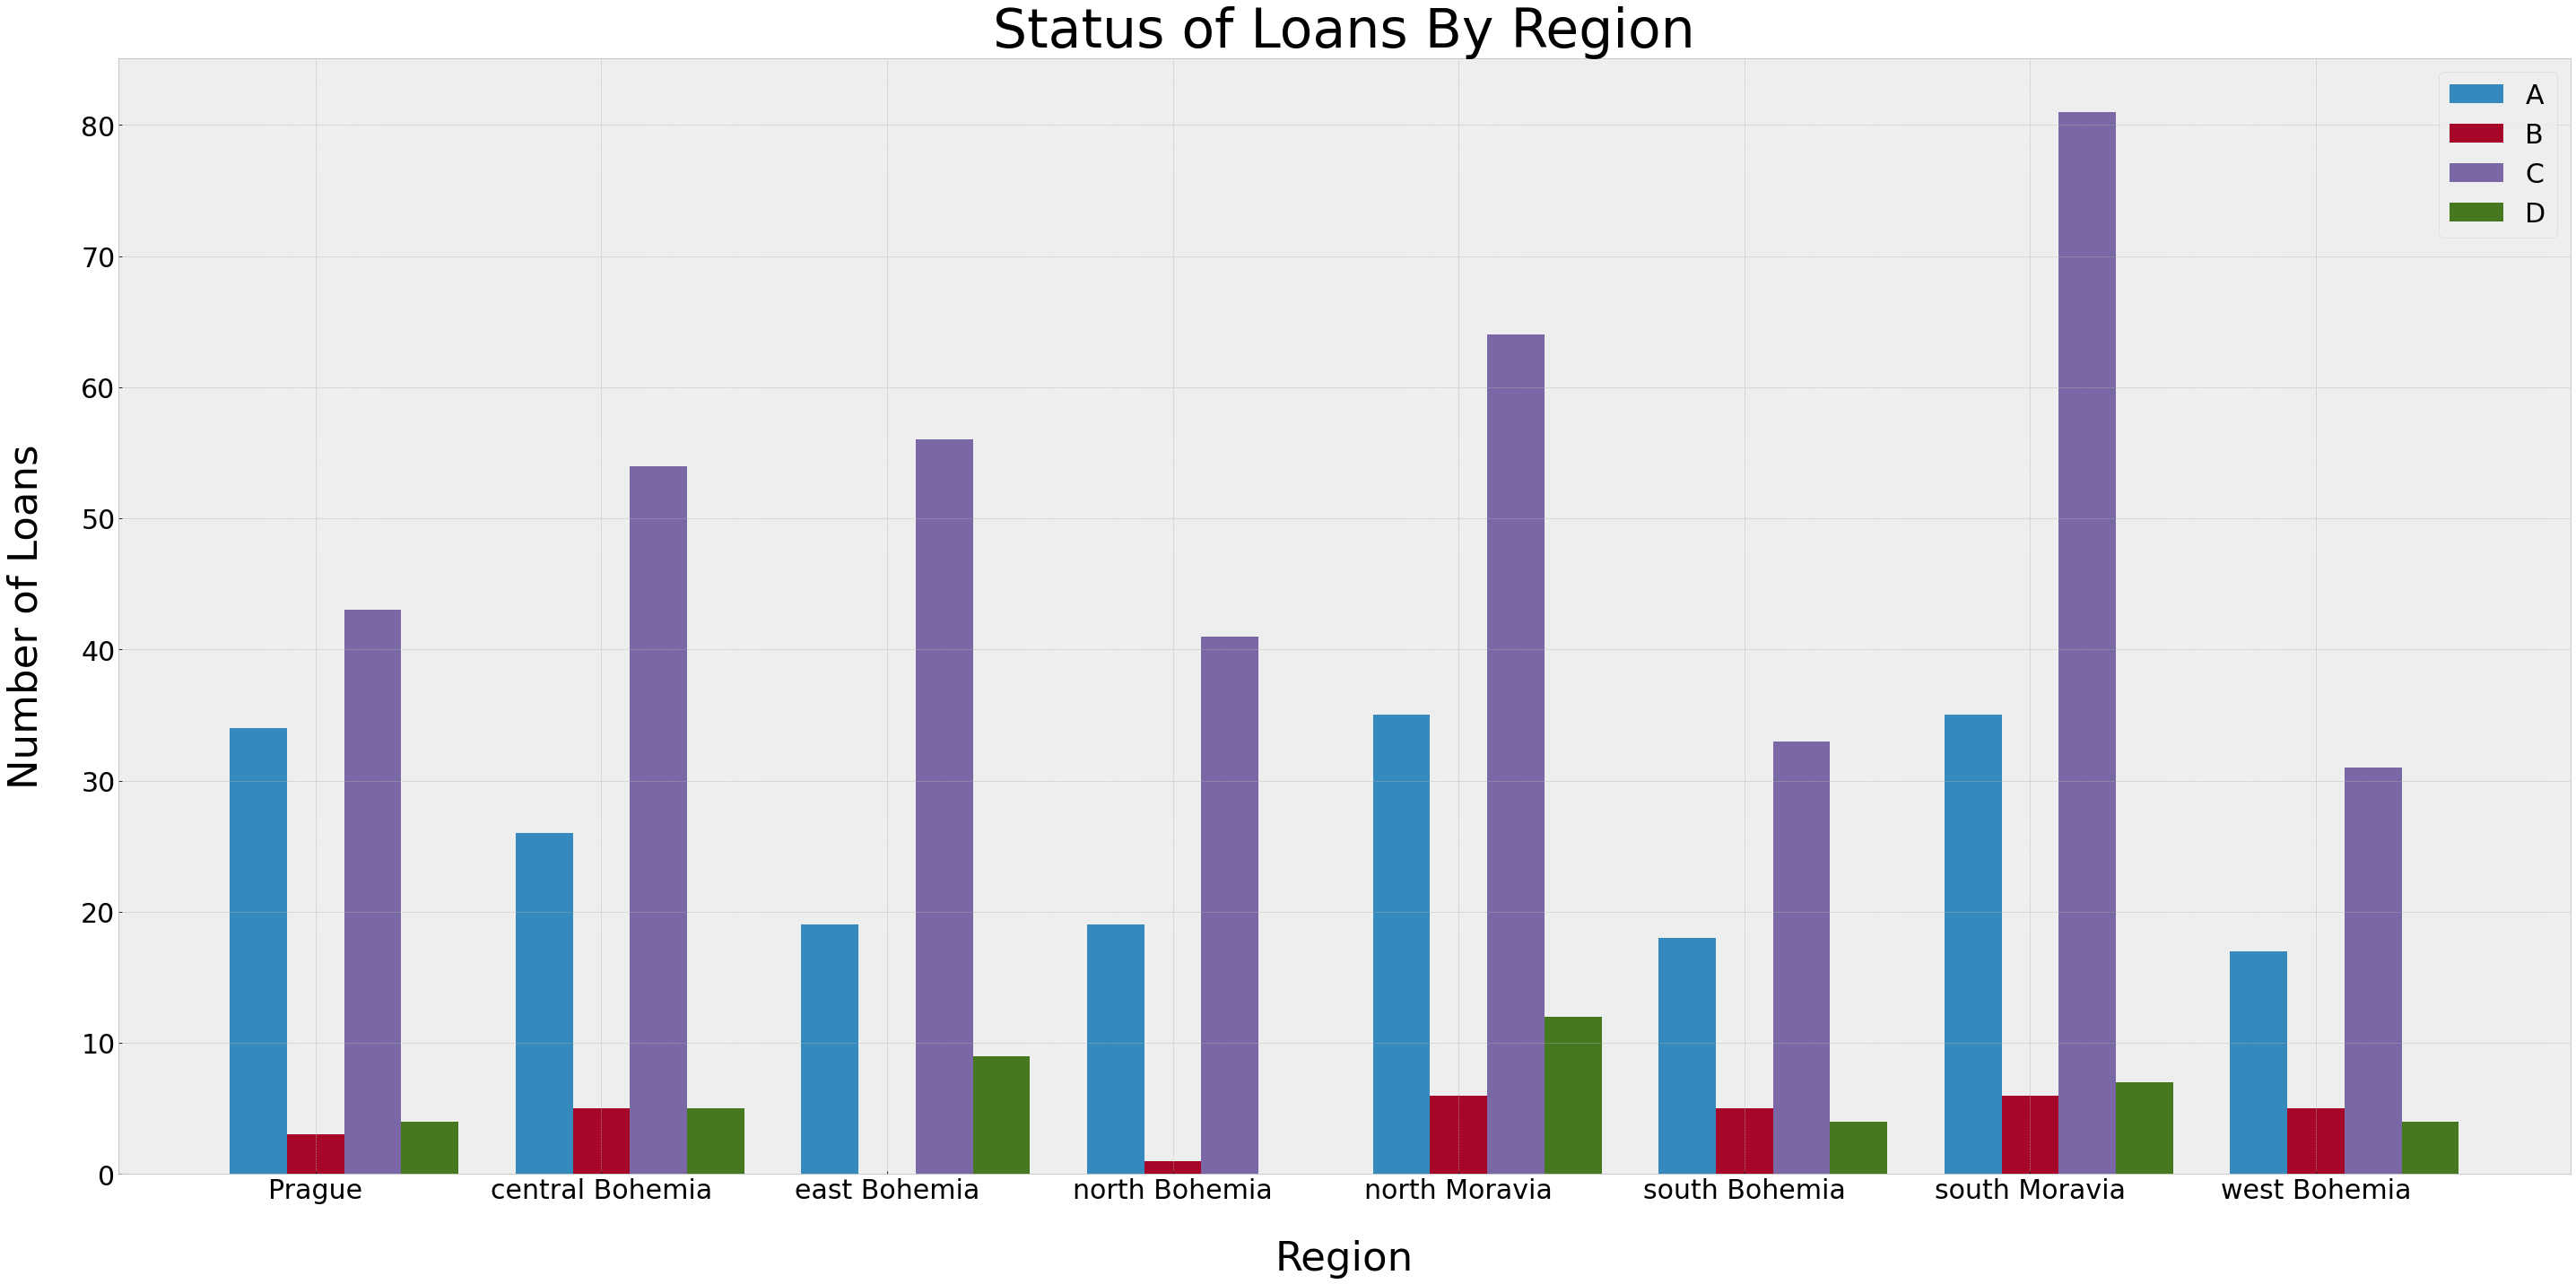

In [24]:
width = 0.20
x1 = np.arange(len(loan_district_labels))
x2 = [x + width for x in x1]
x3 = [x + width for x in x2]
x4 = [x + width for x in x3]

loan_district_labels = list(loan_district2["Region"])
loan_district_labels

fig, ax = plt.subplots(figsize=(40, 20))
ax1 = ax.bar(x1,loan_district2["A"], width, label="A")
ax2 = ax.bar(x2,loan_district2["B"], width, label="B")
ax3 = ax.bar(x3,loan_district2["C"], width, label="C")
ax4 = ax.bar(x4,loan_district2["D"], width, label="D")

ax.set_ylabel('Number of Loans', fontsize=45, labelpad = 40)
ax.set_xlabel('Region', fontsize=45, labelpad = 40)
ax.set_title('Status of Loans By Region', fontsize = 60)
ax.set_xticks([x + width for x in range(len(loan_district_labels))])
ax.set_xticklabels(loan_district_labels, fontsize = 30)
plt.yticks(size=30)
ax.legend(fontsize=30)

fig.tight_layout()

## Order Table

Stores information about each payment order issued by an account. 

* 6471 records
* **Primary index:** order_id 
* **5 non-primary-index columns:** account_id, bank_to, account_to, amount, k_symbol
* **bank_to:** the partnering bank that the payment order is being issued to
* **account_to:** the partnering account that they payment order is being collected by 
* **amount:** the amount of the payment order
* **k_symbol:** the reason for the payment order i.e. house payment, loan payment, etc. 

In [33]:
### Reading in district table from financial.db and converting to a dataframe
order = pd.read_sql_query("SELECT * FROM `order`;", conn,
                          index_col = "order_id")

order.loc[order["k_symbol"] == "SIPO", "k_symbol"] = "Household"
order.loc[order["k_symbol"] == "POJISTNE", "k_symbol"] = "Insurance"
order.loc[order["k_symbol"] == "LEASING", "k_symbol"] = "Leasing"
order.loc[order["k_symbol"] == "UVER", "k_symbol"] = "Loan"
order.info()
order.head(n = 5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6471 entries, 29401 to 46338
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   account_id  6471 non-null   int64  
 1   bank_to     6471 non-null   object 
 2   account_to  6471 non-null   int64  
 3   amount      6471 non-null   float64
 4   k_symbol    6471 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 303.3+ KB


,account_id,bank_to,account_to,amount,k_symbol
order_id,,,,,
29401,1,YZ,87144583,2452.00,Household
29402,2,ST,89597016,3372.70,Loan
29403,2,QR,13943797,7266.00,Household
29404,3,WX,83084338,1135.00,Household
29405,3,CD,24485939,327.00,


## Further Exploration

Exploring this dataset has revealed that the bank from which the data originates may have only begun operation during the first year of this dataset (1993). For further exploration using predictive analytics, scaling will be necessary as the amount of data per year is not consistent and steadily increases over each month. Additionally, regional differences rather than district differences may be more valuable given the limited amount of data overall. This is true for loan data, but transaction data may be sufficient enough to separate by district. The demographic data should also be explored further to indicate specific characteristics about districts/regions i.e. where crime or unemployment have increased. The demographic column for number of entrepreneurs could also be explored more as it pertains to loans and transactions. 